In [18]:
import mne
import numpy as np
import pandas as pd

Creating RawArray with float64 data, n_channels=129, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


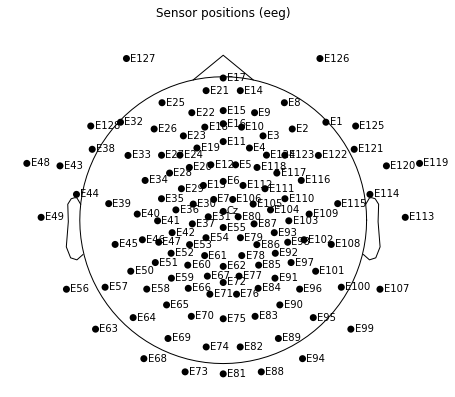

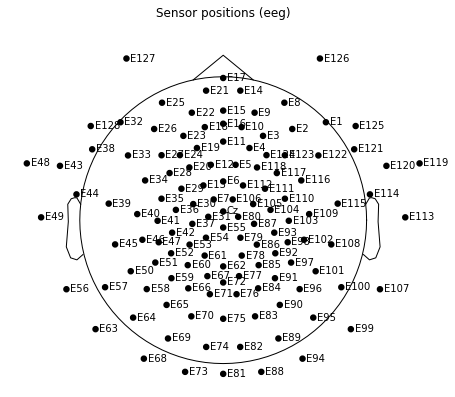

In [19]:
HydroCel_129 = mne.channels.make_standard_montage('GSN-HydroCel-129')
HydroCel_129.plot()

In [20]:
from mne import io, read_proj, read_selection


In [21]:
import mne
import numpy as np
import pandas as pd

def autism_raw(subject,path_absolute):
    s_freq = 500
    #----------channels---------------#
    #fix later!
    path_absolute="D:/Autism/"
    path_subject_channels=path_absolute+subject+"/"+"RestingState_chanlocs.csv"
    print(path_subject_channels)
    #get dataframe of channles location and labels
    df_subject_channels=pd.read_csv(path_subject_channels, delimiter=",",decimal=".")
    #channels labels
    ch_labels=list(df_subject_channels.labels)
    #apply montage
    HydroCel_129 = mne.channels.make_standard_montage('GSN-HydroCel-129')
   #create info for object
    info = mne.create_info(ch_names=ch_labels, sfreq=s_freq, ch_types='eeg', montage=HydroCel_129)

    #----------signal-----------------#
    path_subject_signal=path_absolute+subject+"/"+"RestingState_data.csv"
    #put signal in microvolts
    dat_test=np.loadtxt(path_subject_signal, delimiter=',')*1e-6
    #Create the MNE Raw data object
    raw = mne.io.RawArray(dat_test, info)
    #create in stimuation channel
    stim_info = mne.create_info(['stim'], s_freq, 'stim')
    #create zero signal to store stimulus
    stim_raw = mne.io.RawArray(np.zeros(shape=[1, len(raw._times)]), stim_info)
    #add stim channle to raw signal
    raw.add_channels([stim_raw], force_update_info=True)
    # Set reference Cz
    mne.set_eeg_reference(raw, ref_channels='average', projection=False, ch_type='auto', verbose=None)
    # drop Cz
    raw.drop_channels('Cz')
    #----------events-----------------#
    path_subject_events=path_absolute+subject+"/"+"RestingState_event.csv"
    #read csv of events
    df_subject_event=pd.read_csv(path_subject_events, delimiter=",",decimal=".")
    #fake structure of events
    evs = np.empty(shape=[0, 3])

    for each_element in df_subject_event.values[1:len(df_subject_event)-1]:
        if('break cnt'!=each_element[0]):
            if(int(each_element[0])==30):
                evs = np.vstack((evs, np.array([each_element[1], 0, int(each_element[0])])))
    #print(evs)
    # Add events to data object
    raw.add_events(evs, stim_channel='stim')
    #Check events
    print(mne.find_events(raw))
    #detect flat channels
    flat_chans = np.mean(raw._data[:111, :], axis=1) == 0

    # Interpolate bad channels
    # read about it here
    # https://mne.tools/dev/auto_tutorials/preprocessing/plot_15_handling_bad_channels.html
    raw.info['bads'] = list(np.array(raw.ch_names[:111])[flat_chans])
    print('Bad channels: ', raw.info['bads'])
    raw.interpolate_bads()
    
    #select left hemispher
#     selection = read_selection(name = ['Left-temporal','Left-parietal','Left-occipital','Left-frontal','Vertex'])

    # Get good eeg channel indices
    eeg_chans = mne.pick_types(raw.info, meg=False, eeg=True)

    #resample to have to 250 hz,
    #this will allow us to compare with
    #the HDHD dataset.
    raw.resample(250, npad='auto')

    #return Raw object from mne class
    return raw



In [22]:
autism = autism_raw('NDARAD232HVV','D:/Autism/')

D:/Autism/NDARAD232HVV/RestingState_chanlocs.csv


<ipython-input-21-23464e025c3b>:19: DeprecationWarning: Passing montage to create_info is deprecated and will be removed in 0.21, use raw.set_montage (or epochs.set_montage, etc.) instead
  info = mne.create_info(ch_names=ch_labels, sfreq=s_freq, ch_types='eeg', montage=HydroCel_129)


Creating RawArray with float64 data, n_channels=111, n_times=169991
    Range : 0 ... 169990 =      0.000 ...   339.980 secs
Ready.
Creating RawArray with float64 data, n_channels=1, n_times=169991
    Range : 0 ... 169990 =      0.000 ...   339.980 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
5 events found
Event IDs: [30]
[[ 27715      0     30]
 [ 57714      0     30]
 [ 87714      0     30]
 [117713      0     30]
 [147713      0     30]]
Bad channels:  ['E1', 'E8', 'E14', 'E21', 'E25', 'E32']
    Automatic origin fit: head of radius 92.6 mm
Computing interpolation matrix from 104 sensor positions
Interpolating 6 sensors
5 events found
Event IDs: [30]
5 events found
Event IDs: [30]


In [23]:
def hbn_raw(subject,path_absolute):
    s_freq = 500
    #----------channels---------------#
    #fix later!
    path_absolute="C:/Users/Akshay/PycharmProjects/austismthesis/Data/Healthy/"
    path_subject_channels=path_absolute+subject+"/"+"RestingState_chanlocs.csv"
    print(path_subject_channels)
    #get dataframe of channles location and labels
    df_subject_channels=pd.read_csv(path_subject_channels, delimiter=",",decimal=".")
    #channels labels
    ch_labels=list(df_subject_channels.labels)
    #apply montage
    HydroCel_129 = mne.channels.make_standard_montage('GSN-HydroCel-129')
    #create info for object
    info = mne.create_info(ch_names=ch_labels, sfreq=s_freq, ch_types='eeg', montage=HydroCel_129)

    #----------signal-----------------#
    path_subject_signal=path_absolute+subject+"/"+"RestingState_data.csv"
    #put signal in microvolts
    dat_test=np.loadtxt(path_subject_signal, delimiter=',')*1e-6
    #Create the MNE Raw data object
    raw = mne.io.RawArray(dat_test, info)

    #create in stimuation channel
    stim_info = mne.create_info(['stim'], s_freq, 'stim')
    #create zero signal to store stimulus
    stim_raw = mne.io.RawArray(np.zeros(shape=[1, len(raw._times)]), stim_info)

    #add stim channle to raw signal
    raw.add_channels([stim_raw], force_update_info=True)
    # Set reference Cz
    mne.set_eeg_reference(raw, ref_channels='average', projection=False, ch_type='auto', verbose=None)
    # drop Cz
    raw.drop_channels('Cz')

    #----------events-----------------#
    path_subject_events=path_absolute+subject+"/"+"RestingState_event.csv"

    #read csv of events
    df_subject_event=pd.read_csv(path_subject_events, delimiter=",",decimal=".")

    #fake structure of events
    evs = np.empty(shape=[0, 3])

    for each_element in df_subject_event.values[1:len(df_subject_event)-1]:
        if('break cnt'!=each_element[0]):
            if(int(each_element[0])==30):
                evs = np.vstack((evs, np.array([each_element[1], 0, int(each_element[0])])))
    #print(evs)
    # Add events to data object
    raw.add_events(evs, stim_channel='stim')

    #Check events
    print(mne.find_events(raw))

    #detect flat channels
    flat_chans = np.mean(raw._data[:111, :], axis=1) == 0

    # Interpolate bad channels
    # read about it here
    # https://mne.tools/dev/auto_tutorials/preprocessing/plot_15_handling_bad_channels.html

    raw.info['bads'] = list(np.array(raw.ch_names[:111])[flat_chans])
    print('Bad channels: ', raw.info['bads'])
    raw.interpolate_bads()
    #select left hemispher
    selection = read_selection(name = ['Right-temporal','Right-parietal','Right-occipital','Right-frontal','Vertex'])

    # Get good eeg channel indices
    eeg_chans = mne.pick_types(raw.info, meg=False, eeg=True,selection=selection)

    #resample to have to 250 hz,
    #this will allow us to compare with
    #the HDHD dataset.
    raw.resample(250, npad='auto')
    #return Raw object from mne class
    return raw

healthy = hbn_raw(subject='NDARAA075AMK',path_absolute="C:/Users/Akshay/PycharmProjects/austismthesis/Data/Healthy/"
)

C:/Users/Akshay/PycharmProjects/austismthesis/Data/Healthy/NDARAA075AMK/RestingState_chanlocs.csv


<ipython-input-23-3d6b556c64ad>:15: DeprecationWarning: Passing montage to create_info is deprecated and will be removed in 0.21, use raw.set_montage (or epochs.set_montage, etc.) instead
  info = mne.create_info(ch_names=ch_labels, sfreq=s_freq, ch_types='eeg', montage=HydroCel_129)


Creating RawArray with float64 data, n_channels=111, n_times=182086
    Range : 0 ... 182085 =      0.000 ...   364.170 secs
Ready.
Creating RawArray with float64 data, n_channels=1, n_times=182086
    Range : 0 ... 182085 =      0.000 ...   364.170 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
5 events found
Event IDs: [30]
[[ 39807      0     30]
 [ 69807      0     30]
 [ 99802      0     30]
 [129802      0     30]
 [159807      0     30]]
Bad channels:  ['E1', 'E8', 'E14', 'E21', 'E25']
    Automatic origin fit: head of radius 92.6 mm
Computing interpolation matrix from 105 sensor positions
Interpolating 5 sensors
5 events found
Event IDs: [30]
5 events found
Event IDs: [30]


# Plot autism power spectral density

In [24]:
# Let's take autism eeg signal
raw = autism

Effective window size : 8.192 (s)


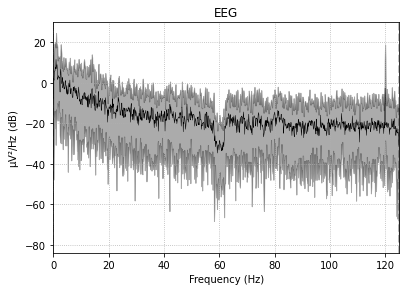

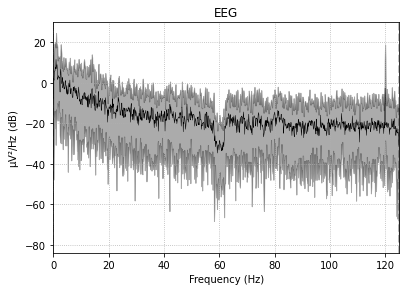

In [25]:
# plot power spectral density
raw.plot_psd(area_mode='range', tmax=10.0, show=False, average=True)


Effective window size : 8.192 (s)


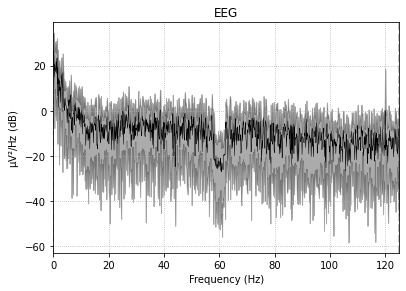

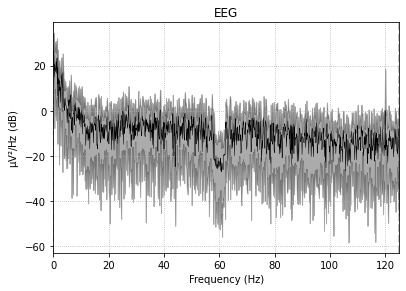

In [26]:
raw = healthy
raw.plot_psd(area_mode='range', tmax=10.0, show=False, average=True)


# Compute the power spectral density (PSD) using multitapers.

Calculates spectral density for orthogonal tapers, then averages them together for each channel

In [27]:
tmin, tmax = 0, 60  # use the first 60s of data

# fmin, fmax = 2, 250  # look at frequencies between 2 and 300Hz
n_fft = 2048  # the FFT size (n_fft). Ideally a power of 2

In [28]:
raw = autism
f, ax = plt.subplots()
psds, freqs = psd_multitaper(raw)
psds = 10 * np.log10(psds)
psds_mean = psds.mean(0)
psds_std = psds.std(0)

ax.plot(freqs, psds_mean, color='k')
ax.fill_between(freqs, psds_mean - psds_std, psds_mean + psds_std,
                color='k', alpha=.5)
ax.set(title='Multitaper PSD of an ASD subject', xlabel='Frequency',
       ylabel='Power Spectral Density (dB)')
plt.show()

AttributeError: module 'matplotlib' has no attribute 'subplots'

In [29]:
raw = healthy
f, ax = plt.subplots()
psds, freqs = psd_multitaper(raw)
psds = 10 * np.log10(psds)
psds_mean = psds.mean(0)
psds_std = psds.std(0)

ax.plot(freqs, psds_mean, color='k')
ax.fill_between(freqs, psds_mean - psds_std, psds_mean + psds_std,
                color='k', alpha=.5)
ax.set(title='Multitaper PSD of Normal subject', xlabel='Frequency',
       ylabel='Power Spectral Density (dB)')
plt.show()

AttributeError: module 'matplotlib' has no attribute 'subplots'

The above two graphs shows that there is PSD difference betweeen Healthy and Autism patient

# PSD between Alpha frequency (8-12 Hz)

In [ ]:
raw = autism
f, ax = plt.subplots()
psds, freqs = psd_multitaper(raw,low_bias=True, tmin=tmin, tmax=tmax,
                             fmin=8, fmax=12, proj=True, picks=picks,
                             n_jobs=1)
psds = 10 * np.log10(psds)
psds_mean = psds.mean(0)
psds_std = psds.std(0)

ax.plot(freqs, psds_mean, color='k')
ax.fill_between(freqs, psds_mean - psds_std, psds_mean + psds_std,
                color='k', alpha=.5)
ax.set(title='Multitaper PSD : ASD', xlabel='Alpha Frequency',
       ylabel='Power Spectral Density (dB)')
plt.show()

In [17]:
raw = healthy
f, ax = plt.subplots()
psds, freqs = psd_multitaper(raw,low_bias=True, tmin=tmin, tmax=tmax,
                             fmin=8, fmax=12, proj=True, picks=picks,
                             n_jobs=1)
psds = 10 * np.log10(psds)
psds_mean = psds.mean(0)
psds_std = psds.std(0)

ax.plot(freqs, psds_mean, color='k')
ax.fill_between(freqs, psds_mean - psds_std, psds_mean + psds_std,
                color='k', alpha=.5)
ax.set(title='Multitaper PSD : Normal', xlabel='Alpha Frequency',
       ylabel='Power Spectral Density (dB)')
plt.show()

AttributeError: module 'matplotlib' has no attribute 'subplots'

# PSD between Beta frequency range (13-30 Hz)

In [ ]:
raw = autism
f, ax = plt.subplots()
psds, freqs = psd_multitaper(raw,low_bias=True, tmin=tmin, tmax=tmax,
                             fmin=13, fmax=30, proj=True, picks=picks,
                             n_jobs=1)
psds = 10 * np.log10(psds)
psds_mean = psds.mean(0)
psds_std = psds.std(0)

ax.plot(freqs, psds_mean, color='k')
ax.fill_between(freqs, psds_mean - psds_std, psds_mean + psds_std,
                color='k', alpha=.5)
ax.set(title='Multitaper PSD: ASD', xlabel='Beta Frequency',
       ylabel='Power Spectral Density (dB)')
plt.show()

No projector specified for this dataset. Please consider the method self.add_proj.
    Using multitaper spectrum estimation with 7 DPSS windows


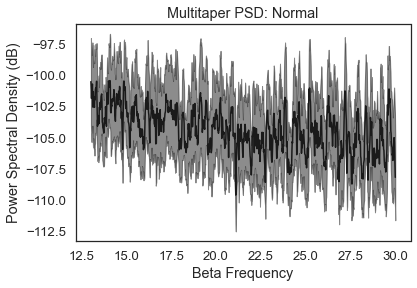

In [339]:
raw = healthy
f, ax = plt.subplots()
psds, freqs = psd_multitaper(raw,low_bias=True, tmin=tmin, tmax=tmax,
                             fmin=13, fmax=30, proj=True, picks=picks,
                             n_jobs=1)
psds = 10 * np.log10(psds)
psds_mean = psds.mean(0)
psds_std = psds.std(0)

ax.plot(freqs, psds_mean, color='k')
ax.fill_between(freqs, psds_mean - psds_std, psds_mean + psds_std,
                color='k', alpha=.5)
ax.set(title='Multitaper PSD: Normal', xlabel='Beta Frequency',
       ylabel='Power Spectral Density (dB)')
plt.show()

# PSD between Theta frequency range (4-7 Hz)


No projector specified for this dataset. Please consider the method self.add_proj.
    Using multitaper spectrum estimation with 7 DPSS windows


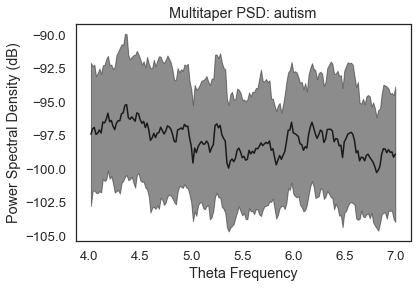

In [341]:
raw = autism
f, ax = plt.subplots()
psds, freqs = psd_multitaper(raw,low_bias=True, tmin=tmin, tmax=tmax,
                             fmin=4, fmax=7, proj=True, picks=picks,
                             n_jobs=1)
psds = 10 * np.log10(psds)
psds_mean = psds.mean(0)
psds_std = psds.std(0)

ax.plot(freqs, psds_mean, color='k')
ax.fill_between(freqs, psds_mean - psds_std, psds_mean + psds_std,
                color='k', alpha=.5)
ax.set(title='Multitaper PSD: autism', xlabel='Theta Frequency',
       ylabel='Power Spectral Density (dB)')
plt.show()

No projector specified for this dataset. Please consider the method self.add_proj.
    Using multitaper spectrum estimation with 7 DPSS windows


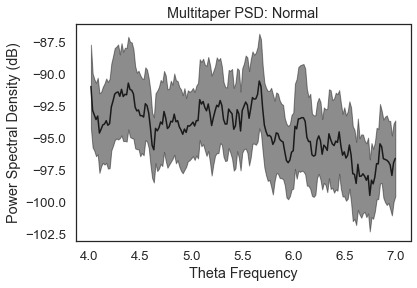

In [342]:
raw = healthy
f, ax = plt.subplots()
psds, freqs = psd_multitaper(raw,low_bias=True, tmin=tmin, tmax=tmax,
                             fmin=4, fmax=7, proj=True, picks=picks,
                             n_jobs=1)
psds = 10 * np.log10(psds)
psds_mean = psds.mean(0)
psds_std = psds.std(0)

ax.plot(freqs, psds_mean, color='k')
ax.fill_between(freqs, psds_mean - psds_std, psds_mean + psds_std,
                color='k', alpha=.5)
ax.set(title='Multitaper PSD: Normal', xlabel='Theta Frequency',
       ylabel='Power Spectral Density (dB)')
plt.show()

# PSD between Delta frequency range (0-4 Hz)

No projector specified for this dataset. Please consider the method self.add_proj.
    Using multitaper spectrum estimation with 7 DPSS windows


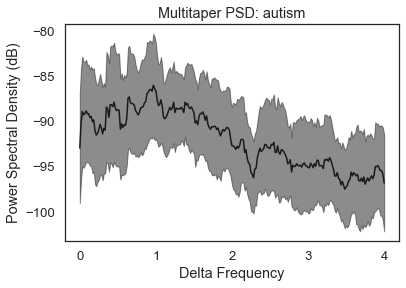

In [344]:
raw = autism
f, ax = plt.subplots()
psds, freqs = psd_multitaper(raw,low_bias=True, tmin=tmin, tmax=tmax,
                             fmin=0, fmax=4, proj=True, picks=picks,
                             n_jobs=1)
psds = 10 * np.log10(psds)
psds_mean = psds.mean(0)
psds_std = psds.std(0)

ax.plot(freqs, psds_mean, color='k')
ax.fill_between(freqs, psds_mean - psds_std, psds_mean + psds_std,
                color='k', alpha=.5)
ax.set(title='Multitaper PSD: autism', xlabel='Delta Frequency',
       ylabel='Power Spectral Density (dB)')
plt.show()

No projector specified for this dataset. Please consider the method self.add_proj.
    Using multitaper spectrum estimation with 7 DPSS windows


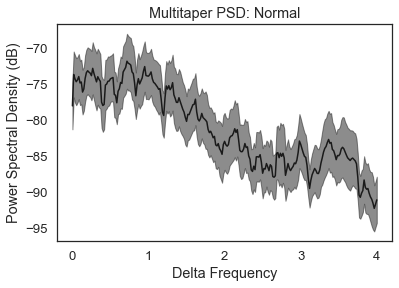

In [345]:
raw = healthy
f, ax = plt.subplots()
psds, freqs = psd_multitaper(raw,low_bias=True, tmin=tmin, tmax=tmax,
                             fmin=0, fmax=4, proj=True, picks=picks,
                             n_jobs=1)
psds = 10 * np.log10(psds)
psds_mean = psds.mean(0)
psds_std = psds.std(0)

ax.plot(freqs, psds_mean, color='k')
ax.fill_between(freqs, psds_mean - psds_std, psds_mean + psds_std,
                color='k', alpha=.5)
ax.set(title='Multitaper PSD: Normal', xlabel='Delta Frequency',
       ylabel='Power Spectral Density (dB)')
plt.show()